<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science/blob/main/LigamxElizondoTrevi%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio de datos

####Realizaremos un analisis exploratorio de datos sobre el conjunto de datos de los partidos de la liga MX de la temporada 2012 al 2024. el objetivo es comprender que factores pueden influir en el resultado de un partido y determinar si exite relacion entre estos factores para poder predecir el resultado de un partido.


#Verificacion de valores nulos

####Se verifica si tenemos valores nulos en nustro conjunto de datos y en caso de obtener valores nulos se eliminaran del dataset.

In [ ]:
#Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnarDataSource, HoverTool

#Cargar el conjunto de datos de resultados de liga mx
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

#verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(datos_ligamx.isnull().sum())




Valores nulos en el conjunto de datos:
Country              0
League               0
Season               0
Date                 0
Time                 0
Local                0
Visitante            0
GL                   0
GV                   0
Res                  0
PrL                  0
PrE                  0
PrV                  0
MaxPayoutL           0
MaxPayoutE           0
MaxPayoutV           0
AvgPayoutL           0
AvgPayoutE           0
AvgPayoutV           0
Matchday             0
Ciudad               0
PuntosPorPartido     0
Goles en conjunto    0
Marcador             0
dtype: int64


In [ ]:
datos_ligamx

,Country,League,Season,Date,Time,Local,Visitante,GL,GV,Res,...,AvgPayoutL,AvgPayoutE,AvgPayoutV,Matchday,Ciudad,PuntosPorPartido,Goles en conjunto,Marcador,Frecuencia Relativa,Porcentaje
0,Mexico,Liga MX,2012/2013,2012-07-21,19:30:00,Chiapas,Tigres UANL,0,4,V,...,2.74,3.10,2.51,sábado,Otro,3,4,0-4,NaN,NaN
1,Mexico,Liga MX,2012/2013,2012-07-21,21:30:00,Club Tijuana,Puebla,2,0,L,...,1.93,3.26,3.83,sábado,Otro,3,2,2-0,NaN,NaN
2,Mexico,Liga MX,2012/2013,2012-07-21,1900-01-01 17:00:00,Cruz Azul,Monarcas,0,0,E,...,2.00,3.26,3.56,sábado,CDMX,1,0,0-0,NaN,NaN
3,Mexico,Liga MX,2012/2013,2012-07-21,1900-01-01 17:00:00,Queretaro,Club Leon,0,2,V,...,3.26,3.18,2.16,sábado,Otro,3,2,0-2,NaN,NaN
4,Mexico,Liga MX,2012/2013,2012-07-22,19:00:00,Monterrey,Club America,0,0,E,...,1.92,3.37,3.79,domingo,Nuevo Leon,1,0,0-0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,Mexico,Liga MX,2023/2024,2024-03-17,19:00:00,Tigres UANL,Mazatlan FC,5,1,L,...,1.59,4.05,5.26,domingo,Nuevo Leon,3,6,5-1,NaN,NaN
3912,Mexico,Liga MX,2023/2024,2024-03-17,21:05:00,Guadalajara Chivas,Club America,0,0,E,...,3.58,3.47,2.00,domingo,Guadalajara,1,0,0-0,NaN,NaN
3913,Mexico,Liga MX,2023/2024,2024-03-17,1900-01-01 17:00:00,Atlas,Monterrey,1,2,V,...,3.52,3.34,2.06,domingo,Guadalajara,3,3,1-2,NaN,NaN
3914,Mexico,Liga MX,2023/2024,2024-03-18,19:00:00,Atl. San Luis,Pachuca,2,1,L,...,3.39,3.59,2.02,lunes,Otro,3,3,2-1,NaN,NaN


In [ ]:
#Hipotesis 2. ¿cuales son los resultados mas comunes?

import plotly.express as px

# Crea una grafica de barras con la informacion
fig = px.bar(datos_ligamx, x="Marcador", color="Marcador", text="Marcador", title="Frecuencia de resultados en la Liga MX")

# Ordena las barras en orden decendente
fig.update_xaxes(categoryorder="total descending")

fig.show()


In [ ]:
#Hipotesis 2. ¿cuales son los resultados mas comunes? determina el porcentaje de sucesos de cada resultado? y divide el total_partidos entre porcentajes_resultados

total_partidos = datos_ligamx.shape[0]
porcentajes_resultados = datos_ligamx['Marcador'].value_counts(normalize=True) * 100
resultados_comunes = pd.DataFrame({'Resultado': porcentajes_resultados.index, 'Porcentaje': porcentajes_resultados.values})
resultados_comunes['Porcentaje'] = resultados_comunes['Porcentaje'].round(2)
resultados_comunes['Total Partidos'] = (resultados_comunes['Porcentaje'] * total_partidos / 100).astype(int)

print("\nTotal de partidos en este dataset:")
print(total_partidos)
print("\nPorcentajes de cada resultado y su resultado en numero")
print(resultados_comunes)



Total de partidos en este dataset:
3916

Porcentajes de cada resultado y su resultado en numero
   Resultado  Porcentaje  Total Partidos
0        1-1       13.56             531
1        1-0       10.21             399
2        2-1        9.32             364
3        0-1        8.02             314
4        0-0        7.61             298
5        1-2        7.23             283
6        2-0        7.05             276
7        2-2        5.49             214
8        3-1        4.44             173
9        3-0        3.93             153
10       0-2        3.88             151
11       3-2        3.19             124
12       1-3        2.68             104
13       2-3        1.97              77
14       0-3        1.79              70
15       4-1        1.74              68
16       4-0        1.51              59
17       3-3        0.87              34
18       1-4        0.77              30
19       4-2        0.77              30
20       2-4        0.54              21
2

In [ ]:
# prompt: Tabla con el index de Visitante con la columna Res filtrada por V y Ciudad, Sumando los valores de la columna de PuntosPorPartido

tabla_visitante = datos_ligamx[datos_ligamx['Res'] == 'V'].groupby(['Visitante', 'Ciudad']).sum().reset_index()
tabla_visitante['PuntosPorPartido'] = tabla_visitante['PuntosPorPartido']
tabla_visitante.pivot_table(index='Visitante', columns='Ciudad', values='PuntosPorPartido')


<ipython-input-173-1471bdcb56c7>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Ciudad,CDMX,Guadalajara,Nuevo Leon,Otro
Visitante,,,,
Atl. San Luis,24.0,15.0,3.0,39.0
Atlante,NaN,6.0,NaN,15.0
Atlas,42.0,15.0,6.0,108.0
Chiapas,9.0,9.0,6.0,21.0
Club America,57.0,48.0,30.0,183.0
Club Leon,45.0,30.0,12.0,147.0
Club Tijuana,27.0,21.0,12.0,63.0
Cruz Azul,39.0,30.0,21.0,123.0
Dorados de Sinaloa,NaN,NaN,NaN,3.0


In [ ]:
# prompt: Tabla con el index de Visitante con la columna Res filtrada por V y Ciudad, Sumando los valores de la columna de PuntosPorPartido

tabla_visitante = datos_ligamx[datos_ligamx['Res'] == 'L'].groupby(['Local', 'Ciudad']).sum().reset_index()
tabla_visitante['PuntosPorPartido'] = tabla_visitante['PuntosPorPartido']
tabla_visitante.pivot_table(index='Local', columns='Ciudad', values='PuntosPorPartido')


<ipython-input-171-8b52567f0c83>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Ciudad,CDMX,Guadalajara,Nuevo Leon,Otro
Local,,,,
Atl. San Luis,NaN,NaN,NaN,93.0
Atlante,NaN,NaN,NaN,30.0
Atlas,NaN,216.0,NaN,NaN
Chiapas,NaN,NaN,NaN,111.0
Club America,414.0,NaN,NaN,NaN
Club Leon,NaN,NaN,NaN,357.0
Club Tijuana,NaN,NaN,NaN,285.0
Cruz Azul,333.0,NaN,NaN,NaN
Dorados de Sinaloa,NaN,NaN,NaN,18.0


In [ ]:
# prompt: Tabla con el index de Visitante con la columna Res filtrada por V y Ciudad, Sumando los valores de la columna de PuntosPorPartido

tabla_visitante = datos_ligamx[datos_ligamx['Res'] == 'E'].groupby(['Visitante', 'Ciudad']).sum().reset_index()
tabla_visitante['PuntosPorPartido'] = tabla_visitante['PuntosPorPartido']
tabla_visitante.pivot_table(index='Visitante', columns='Ciudad', values='PuntosPorPartido')

<ipython-input-177-b1a74f3a1c94>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Ciudad,CDMX,Guadalajara,Nuevo Leon,Otro
Visitante,,,,
Atl. San Luis,1.0,1.0,7.0,13.0
Atlante,NaN,NaN,1.0,1.0
Atlas,15.0,4.0,10.0,32.0
Chiapas,5.0,4.0,2.0,13.0
Club America,17.0,8.0,11.0,38.0
Club Leon,12.0,6.0,8.0,27.0
Club Tijuana,8.0,8.0,7.0,28.0
Cruz Azul,12.0,7.0,11.0,42.0
Dorados de Sinaloa,1.0,NaN,NaN,3.0


In [ ]:
# Import pandas library
import pandas as pd

# Load the Liga MX dataset
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

# Calculate the correlation matrix
correlation_matrix = datos_ligamx.corr()

# Print the correlation matrix
print(correlation_matrix)

                         GL        GV       PrL       PrE       PrV  \
GL                 1.000000  0.007111  0.254891 -0.216092 -0.235099   
GV                 0.007111  1.000000 -0.195580  0.062761  0.213420   
PrL                0.254891 -0.195580  1.000000 -0.708349 -0.974147   
PrE               -0.216092  0.062761 -0.708349  1.000000  0.535162   
PrV               -0.235099  0.213420 -0.974147  0.535162  1.000000   
MaxPayoutL        -0.232970  0.205703 -0.909089  0.443786  0.950075   
MaxPayoutE         0.208647 -0.075737  0.703662 -0.943384 -0.544071   
MaxPayoutV         0.220912 -0.178341  0.919228 -0.749206 -0.865489   
AvgPayoutL        -0.237944  0.206627 -0.927374  0.467058  0.964861   
AvgPayoutE         0.215430 -0.076518  0.703739 -0.947229 -0.541381   
AvgPayoutV         0.226569 -0.181761  0.936635 -0.755410 -0.883459   
PuntosPorPartido   0.249464  0.084352  0.051095 -0.072446 -0.037851   
Goles en conjunto  0.759268  0.656161  0.065068 -0.122227 -0.038523   

     

<ipython-input-44-e8733f7c20e8>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos_ligamx.corr()


<ipython-input-32-f00295d6b19c>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                         GL        GV       PrL       PrE       PrV  \
GL                 1.000000  0.007111  0.254891 -0.216092 -0.235099   
GV                 0.007111  1.000000 -0.195580  0.062761  0.213420   
PrL                0.254891 -0.195580  1.000000 -0.708349 -0.974147   
PrE               -0.216092  0.062761 -0.708349  1.000000  0.535162   
PrV               -0.235099  0.213420 -0.974147  0.535162  1.000000   
MaxPayoutL        -0.232970  0.205703 -0.909089  0.443786  0.950075   
MaxPayoutE         0.208647 -0.075737  0.703662 -0.943384 -0.544071   
MaxPayoutV         0.220912 -0.178341  0.919228 -0.749206 -0.865489   
AvgPayoutL        -0.237944  0.206627 -0.927374  0.467058  0.964861   
AvgPayoutE         0.215430 -0.076518  0.703739 -0.947229 -0.541381   
AvgPayoutV         0.226569 -0.181761  0.936635 -0.755410 -0.883459   
PuntosPorPartido   0.249464  0.084352  0.051095 -0.072446 -0.037851   
Goles en conjunto  0.759268  0.656161  0.065068 -0.122227 -0.038523   

     

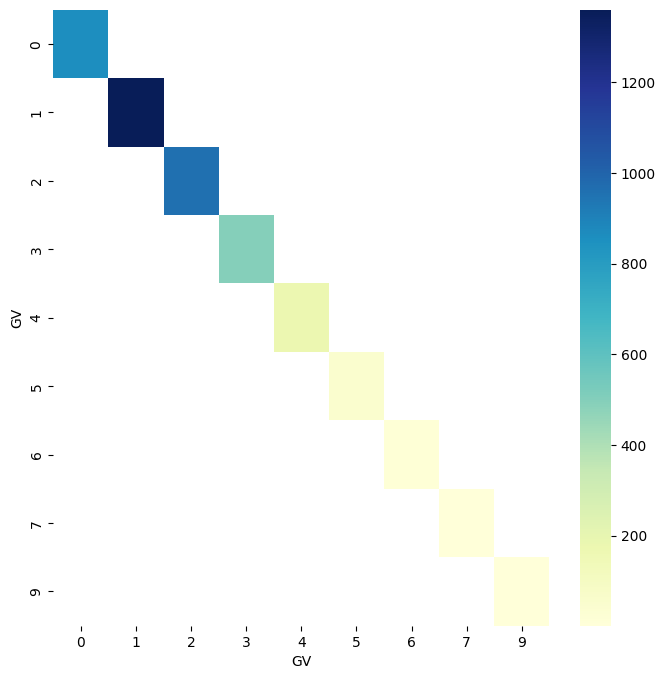

In [ ]:
# Import pandas library
import pandas as pd

# Load the Liga MX dataset
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

# Calculate the correlation matrix
correlation_matrix = datos_ligamx.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a histogram of the "GL" column
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['GL'].value_counts()
    for x_label, grp in datos_ligamx.groupby('GL')
})
sns.heatmap(df_2dhist, cmap="YlGnBu")
plt.xlabel('GV')
plt.ylabel('GV')
plt.show()

<ipython-input-51-7d07769f1828>:17: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                         GL        GV       PrL       PrE       PrV  \
GL                 1.000000  0.007111  0.254891 -0.216092 -0.235099   
GV                 0.007111  1.000000 -0.195580  0.062761  0.213420   
PrL                0.254891 -0.195580  1.000000 -0.708349 -0.974147   
PrE               -0.216092  0.062761 -0.708349  1.000000  0.535162   
PrV               -0.235099  0.213420 -0.974147  0.535162  1.000000   
MaxPayoutL        -0.232970  0.205703 -0.909089  0.443786  0.950075   
MaxPayoutE         0.208647 -0.075737  0.703662 -0.943384 -0.544071   
MaxPayoutV         0.220912 -0.178341  0.919228 -0.749206 -0.865489   
AvgPayoutL        -0.237944  0.206627 -0.927374  0.467058  0.964861   
AvgPayoutE         0.215430 -0.076518  0.703739 -0.947229 -0.541381   
AvgPayoutV         0.226569 -0.181761  0.936635 -0.755410 -0.883459   
PuntosPorPartido   0.249464  0.084352  0.051095 -0.072446 -0.037851   
Goles en conjunto  0.759268  0.656161  0.065068 -0.122227 -0.038523   

     

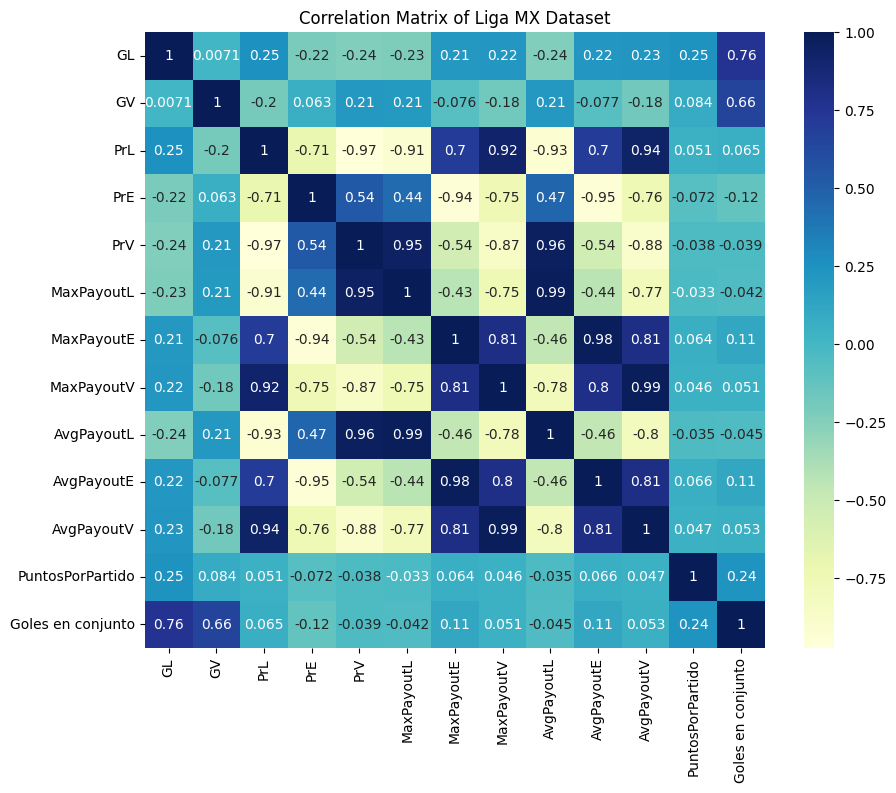

In [ ]:
# prompt: correlacion datos_ligamx y grafica interactiva

# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnarDataSource, HoverTool

# Load the Liga MX dataset
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

# Calculate the correlation matrix
correlation_matrix = datos_ligamx.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Liga MX Dataset")
plt.show()

# Create an interactive scatter plot matrix
scatter_matrix = px.scatter_matrix(datos_ligamx, dimensions=["GL", "GV", "Res"], color="Res")
scatter_matrix.update_traces(diagonal_visible=False)
scatter_matrix.show()


In [ ]:
# prompt: Grafico interactivo comparando las columnas GL y GV

import plotly.express as px

# Assuming 'datos_ligamx' is the DataFrame containing the data
fig = px.scatter(datos_ligamx, x="GL", y="GV", color="Res")
fig.update_layout(title='GL vs GV',
                   xaxis_title='GL',
                   yaxis_title='GV')
fig.show()


In [ ]:
# prompt: grafico interactivo que cuente la cantidad de veces que la columna Goles en conjunto se repite

import plotly.express as px
import plotly.express as px

# Assuming 'datos_ligamx' is the DataFrame containing the data
fig = px.histogram(datos_ligamx, x="Marcador", title='Conteo de Goles en conjunto', color="Res")
fig.update_layout(xaxis_title='Goles en conjunto', yaxis_title='Conteo')
fig.show()


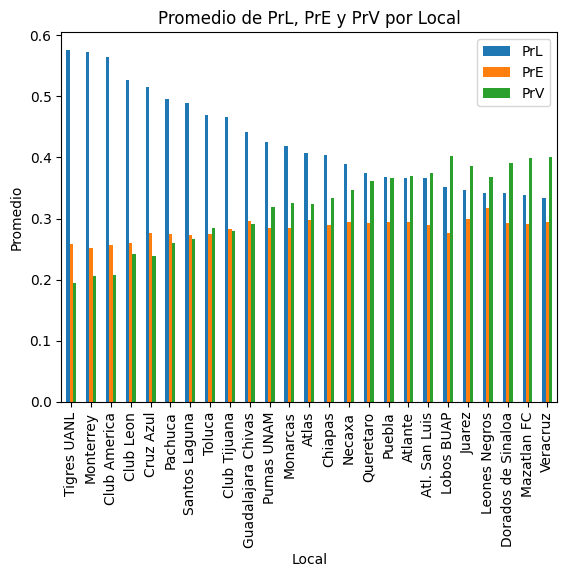

In [ ]:
# prompt: grafica Promedio de las columnas PrL, PrE, PrV por local en orden decendente

# Calculate the average of each column grouped by 'Local'
promedios = datos_ligamx.groupby('Local')[['PrL', 'PrE', 'PrV']].mean()

# Sort the averages in descending order by 'PrL'
promedios_sorted = promedios.sort_values('PrL', ascending=False)

# Plot the averages
promedios_sorted.plot.bar()
plt.xlabel('Local')
plt.ylabel('Promedio')
plt.title('Promedio de PrL, PrE y PrV por Local')
plt.show()


In [ ]:
# prompt: grafica Promedio de las columnas PrL, PrE, PrV por local

# Assuming 'datos_ligamx' is the DataFrame containing the data
fig = px.bar(datos_ligamx, x="Local", y=["PrL", "PrE", "PrV"], barmode='group')
fig.update_layout(title='Promedio de las columnas PrL, PrE, PrV por local',
                   xaxis_title='Local',
                   yaxis_title='Promedio',)

fig.show()


In [ ]:
# prompt: Grafica interactiva sumando la columna PunrosPorPartido, comparando Res, y en x pon Local muestra de forma decendente

import plotly.express as px

# Assuming 'datos_ligamx' is the DataFrame containing the data
fig = px.bar(datos_ligamx, x="Local", y="PuntosPorPartido", color="Res", barmode='group')
fig.update_layout(title='Puntos por partido por Local',
                   xaxis_title='Local',
                   yaxis_title='Puntos',
                   xaxis={'categoryorder':'total descending'})

fig.show()


In [ ]:
# prompt: Grafica interactiva sumando la columna PunrosPorPartido, comparando Res, y en x pon Local muestra de forma decendente

import plotly.express as px

# Assuming 'datos_ligamx' is the DataFrame containing the data
fig = px.bar(datos_ligamx, x="Local", y="PuntosPorPartido", color="Res",)

fig.update_layout(title='Puntos posibles por equipo en partidos por como Local',
                   xaxis_title='Local',
                   yaxis_title='Ciudad',
                   xaxis={'categoryorder':'total descending'})

fig.show()

TypeError: bar() got an unexpected keyword argument 'Group'

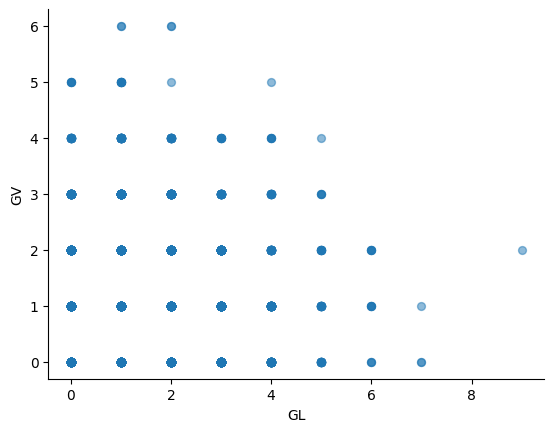

In [ ]:
from matplotlib import pyplot as plt
datos_ligamx.plot(kind='scatter', x='GL', y='GV', s=32, alpha=.50)
plt.gca().spines[['top', 'right',]].set_visible(False)

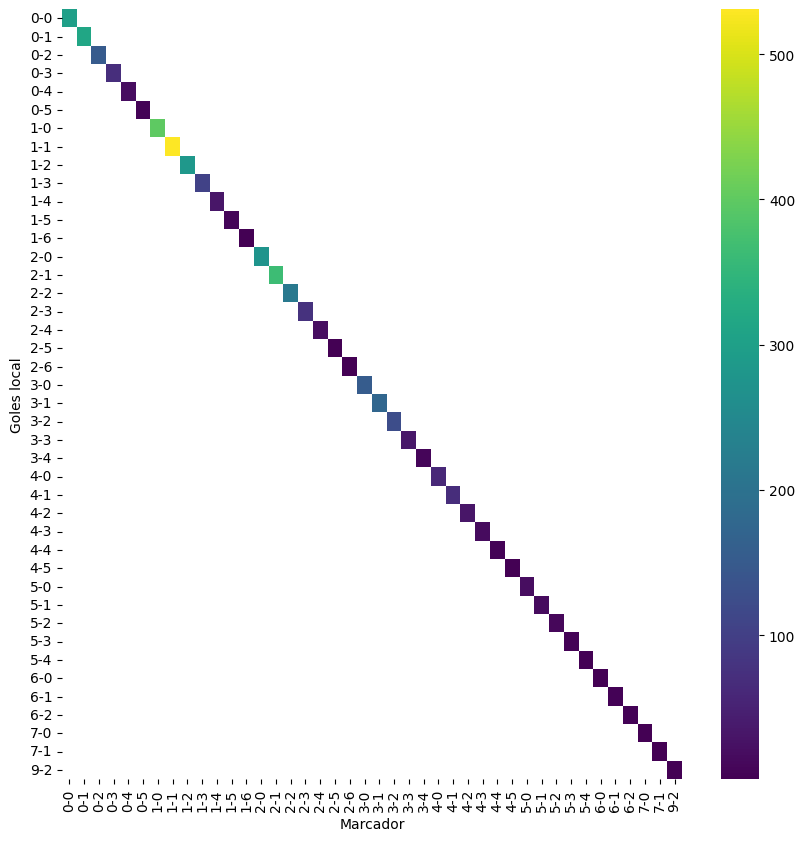

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(10, 10))
df_2dhist = pd.DataFrame({
    x_label: grp['Marcador'].value_counts()
    for x_label, grp in datos_ligamx.groupby('Marcador')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Marcador')
_ = plt.ylabel('Goles local')

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
# Load the dataset
url = "/content/LigaMXDataSet1.xlsx"
datos_ligamx = pd.read_excel(url)

# Calculate correlations
correlaciones = datos_ligamx.corr(numeric_only=)

SyntaxError: invalid syntax (<ipython-input-9-985279949b61>, line 9)

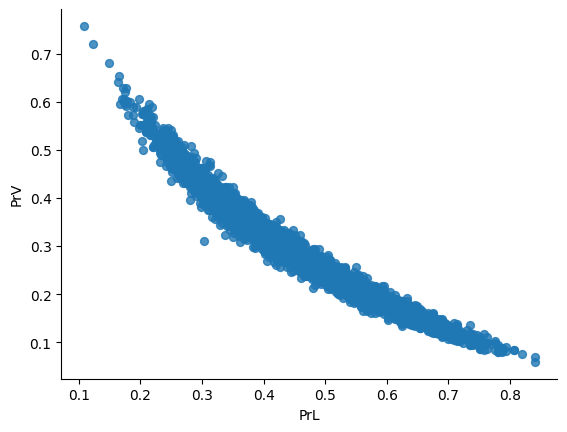

In [ ]:
from matplotlib import pyplot as plt
datos_ligamx.plot(kind='scatter', x='PrL', y='PrV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

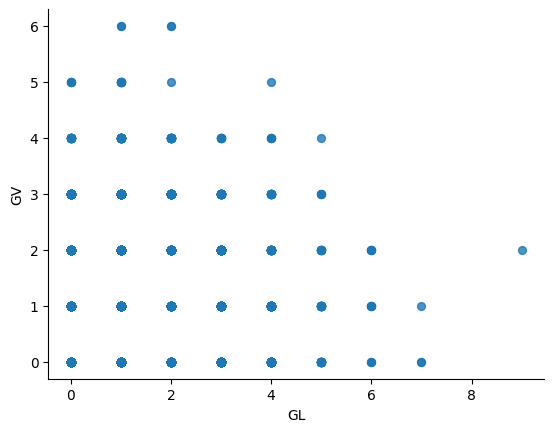

In [ ]:
from matplotlib import pyplot as plt
datos_ligamx.plot(kind='scatter', x='GL', y='GV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)